In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading and cleaning the dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv')
df[df.duplicated()]

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,61352.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
vehicle_reference,61352.0,1.450368,1.109855,1.0,1.0,1.0,2.0,227.0
casualty_reference,61352.0,1.333779,0.981507,1.0,1.0,1.0,1.0,148.0
casualty_class,61352.0,1.482299,0.735614,1.0,1.0,1.0,2.0,3.0
sex_of_casualty,61352.0,1.368790,0.534536,-1.0,1.0,1.0,2.0,9.0
age_of_casualty,61352.0,36.670312,19.574357,-1.0,22.0,34.0,50.0,101.0
age_band_of_casualty,61352.0,6.288157,2.463082,-1.0,5.0,6.0,8.0,11.0
casualty_severity,61352.0,2.783039,0.442318,1.0,3.0,3.0,3.0,3.0
pedestrian_location,61352.0,0.800316,2.197167,0.0,0.0,0.0,0.0,10.0
pedestrian_movement,61352.0,0.645325,2.009611,0.0,0.0,0.0,0.0,9.0


In [4]:
df.columns

Index(['status', 'accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

In [5]:
# dropping duplicates
df.drop_duplicates(inplace=True)

# dropping unnecessary columns
df_cleaned = df.drop(['status', 'accident_index', 'accident_year', 'lsoa_of_casualty'], axis=1, inplace=False)

df_cleaned_with_misses = df_cleaned.copy()
# removing missing observations
df_cleaned = df_cleaned[(df_cleaned != -1).all(1)]
df_cleaned.head(10)

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9
1,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2
2,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10
3,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10
4,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7
5,070154696,4,4,1,1,52,8,3,0,0,0,0,0,9,1,9
8,070155214,2,1,1,1,74,10,2,0,0,0,0,0,1,3,5
9,070155656,1,1,1,1,50,8,3,0,0,0,0,0,9,1,8
10,070156916,2,1,1,1,46,8,2,0,0,0,0,0,1,1,3
11,070163458,1,1,3,1,79,11,3,5,2,0,0,0,0,1,10


**Re-encoding the values**

In [6]:
def convert_area_type(code) :
    if code == 1:
        return 'Urban area'
    if code == 2:
        return 'Small town'
    if code == 3:
        return 'Rural'

In [7]:
def convert_class(code) :
    if code == 1:
        return 'Driver'
    if code == 2:
        return 'Passenger'
    if code == 3:
        return 'Pedestrian'

In [8]:
def convert_sex(code) :
    if code == 1:
        return 'Male'
    if code == 2:
        return 'Female'
    if code == 3:
        return 'Unknown'

In [9]:
def convert_severity(code):
    if code == 1:
        return 'Fatal'
    if code == 2:
        return 'Serious'
    if code == 3:
        return 'Slight'

In [10]:
def convert_age_band(code):
    if code == 1:
        return '0-5'
    if code == 2:
        return '6-10'
    if code == 3:
        return '11-15'
    if code == 4:
        return '16-20'
    if code == 5:
        return '21-25'
    if code == 6:
        return '26-35'
    if code == 7:
        return '36-45'
    if code == 8:
        return '46-55'
    if code == 9:
        return '56-65'
    if code == 10:
        return '66-75'
    if code == 11:
        return '75+'

In [11]:
# converting int values to meaningful strings
df_cleaned_with_misses.casualty_severity = df_cleaned_with_misses.casualty_severity.apply(convert_severity)

df_cleaned.casualty_home_area_type = df_cleaned.casualty_home_area_type.apply(convert_area_type)
df_cleaned.casualty_class = df_cleaned.casualty_class.apply(convert_class)
df_cleaned.sex_of_casualty = df_cleaned.sex_of_casualty.apply(convert_sex)
df_cleaned.casualty_severity = df_cleaned.casualty_severity.apply(convert_severity)
df_cleaned.age_band_of_casualty = df_cleaned.age_band_of_casualty.apply(convert_age_band)
df_cleaned.head(10)

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,070151244,2,1,Driver,Female,46,46-55,Slight,0,0,0,0,0,9,Urban area,9
1,070152668,1,1,Driver,Male,30,26-35,Slight,0,0,0,0,0,9,Urban area,2
2,070154696,1,1,Driver,Female,58,56-65,Slight,0,0,0,0,0,9,Urban area,10
3,070154696,2,3,Driver,Female,78,75+,Slight,0,0,0,0,0,9,Small town,10
4,070154696,3,2,Driver,Male,63,56-65,Slight,0,0,0,0,0,9,Rural,7
5,070154696,4,4,Driver,Male,52,46-55,Slight,0,0,0,0,0,9,Urban area,9
8,070155214,2,1,Driver,Male,74,66-75,Serious,0,0,0,0,0,1,Rural,5
9,070155656,1,1,Driver,Male,50,46-55,Slight,0,0,0,0,0,9,Urban area,8
10,070156916,2,1,Driver,Male,46,46-55,Serious,0,0,0,0,0,1,Urban area,3
11,070163458,1,1,Pedestrian,Male,79,75+,Slight,5,2,0,0,0,0,Urban area,10


# Visualising

In [12]:
print('Total Casualities')
print(len(df_cleaned_with_misses))

Total Casualities
61352


In [13]:
print('Fatal Casualities')
print(df_cleaned_with_misses['casualty_severity'].value_counts()['Fatal'])

print('Serious Casualities')
print(df_cleaned_with_misses['casualty_severity'].value_counts()['Serious'])

print('Slight Casualities')
print(df_cleaned_with_misses['casualty_severity'].value_counts()['Slight'])

Fatal Casualities
790
Serious Casualities
11731
Slight Casualities
48831


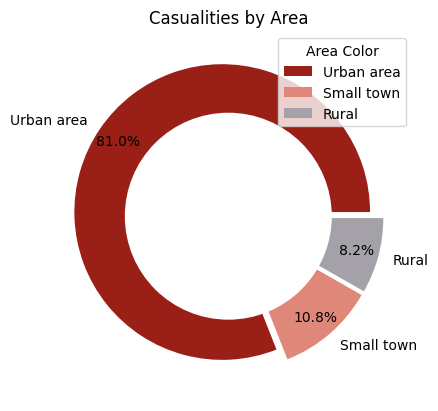

In [14]:
# colors
colors = ['#991f17', '#df8879', '#a4a2a8']

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(df_cleaned['casualty_home_area_type'].value_counts(), colors=colors, labels=df_cleaned['casualty_home_area_type'].unique(),
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Casualities by Area')

# Add Legends
plt.legend(df_cleaned['casualty_home_area_type'].unique(), loc="upper right", title="Area Color")

# Displaying Chart
plt.show()

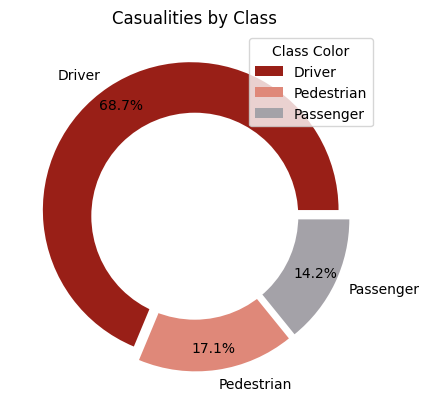

In [15]:
# colors
colors = ['#991f17', '#df8879', '#a4a2a8']

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(df_cleaned['casualty_class'].value_counts(), colors=colors, labels=df_cleaned['casualty_class'].unique(),
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Casualities by Class')

# Add Legends
plt.legend(df_cleaned['casualty_class'].unique(), loc="upper right", title="Class Color")

# Displaying Chart
plt.show()

In [16]:
sunburst_df = df_cleaned.groupby(['sex_of_casualty'])['age_band_of_casualty'].value_counts().reset_index(name='count').sort_values(by='sex_of_casualty')
sunburst_df

,sex_of_casualty,age_band_of_casualty,count
0,Female,26-35,4284
9,Female,6-10,584
8,Female,11-15,1009
7,Female,75+,1082
6,Female,66-75,1219
10,Female,0-5,398
4,Female,56-65,2093
3,Female,21-25,2166
2,Female,46-55,2896
1,Female,36-45,3204


In [17]:
fig = px.sunburst(sunburst_df, path=['sex_of_casualty', 'age_band_of_casualty'],
				values='count')
fig.show()

In [18]:
sunburst_df = df_cleaned.groupby(['sex_of_casualty'])['casualty_class'].value_counts().reset_index(name='count')
fig = px.sunburst(sunburst_df, path=['sex_of_casualty', 'casualty_class'],
				values='count')
fig.show()

<Axes: title={'center': 'Casuality Severity'}, xlabel='index'>

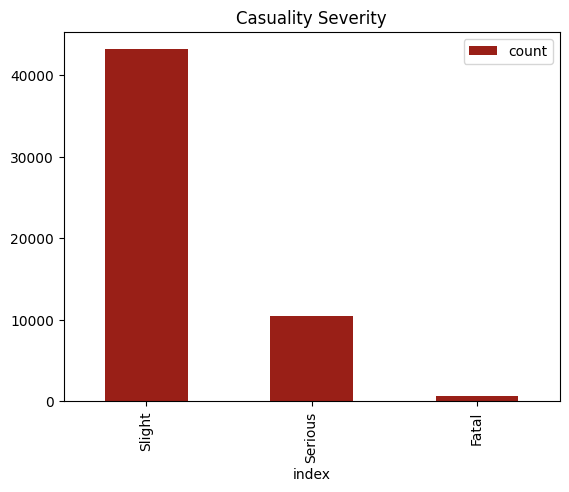

In [19]:
df_cleaned['casualty_severity'].value_counts().reset_index(name='count').plot.bar(x='index', y='count', title='Casuality Severity', color='#991f17')

In [20]:
stacked_df = df_cleaned.groupby(['casualty_severity'])['sex_of_casualty'].value_counts().reset_index(name='count')
stacked_df_x = ['Fatal', 'Serious', 'Slight']
stacked_df_y1 = stacked_df[stacked_df['sex_of_casualty'] == 'Male']
stacked_df_y2 = stacked_df[stacked_df['sex_of_casualty'] == 'Female']

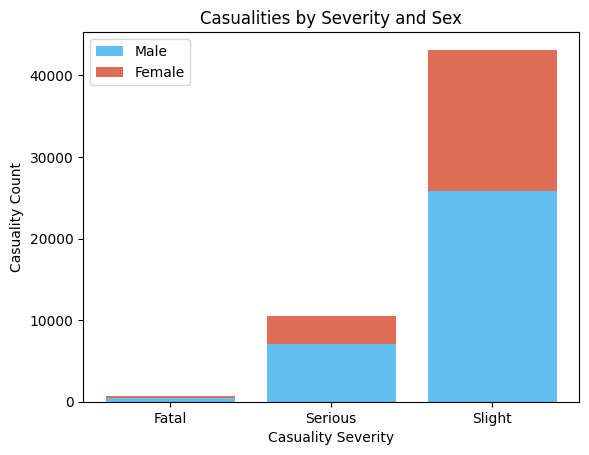

In [21]:
# plot bars in stack manner
plt.bar(stacked_df_x, stacked_df_y1['count'], color='#63bff0')
plt.bar(stacked_df_x, stacked_df_y2['count'], bottom=stacked_df_y1['count'], color='#de6e56')
plt.xlabel("Casuality Severity")
plt.ylabel("Casuality Count")
plt.legend(["Male", "Female"])
plt.title("Casualities by Severity and Sex")

plt.show()

In [22]:
def convert_type(code):
    if code == 9:
        return 'Car occupant'
    if code == 1:
        return 'Cyclist'
    if code == 0:
        return 'Pedestrian'
    if code == 3:
        return 'Motorcycle 125cc and under rider or passenger'
    if code == 5:
        return 'Motorcycle over 500cc rider or passenger'
    if code == 19:
        return 'Van / Goods vehicle (3.5 tonnes mgw or under) occupant'
    if code == 20:
        return 'Goods vehicle (over 3.5t. and under 7.5t.) occupant'
    if code == 2:
        return 'Motorcycle 50cc and under rider or passenger'

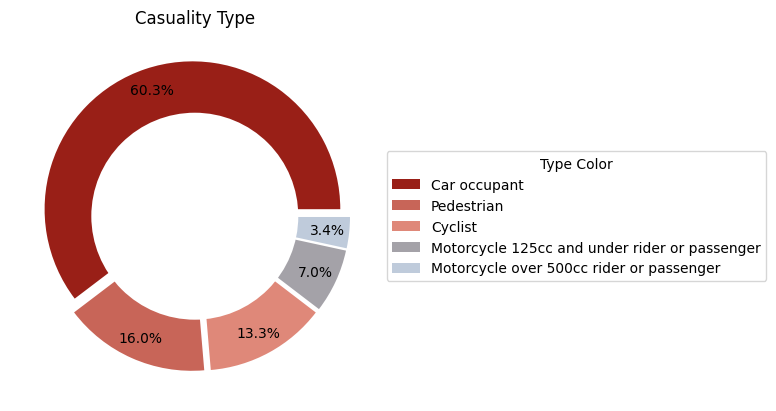

In [23]:
# colors
colors = ['#991f17','#c86558', '#df8879', '#a4a2a8', '#bfcbdb']

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(df_cleaned['casualty_type'].value_counts()[:5], colors=colors,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Casuality Type')

# Add Legends
legend_df = df_cleaned['casualty_type'].value_counts()[:5].rename_axis('casualty_type').reset_index(name='count')
legend_df.casualty_type = legend_df.casualty_type.apply(convert_type)
plt.legend(legend_df['casualty_type'], loc="center left", title="Type Color", bbox_to_anchor=(1, 0.5))

# Displaying Chart
plt.show()

In [24]:
fatal_df = df_cleaned[df_cleaned['casualty_severity']=='Fatal']
fatal_df

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
477,131144330,1,1,Driver,Male,37,36-45,Fatal,0,0,0,0,0,4,Urban area,2
486,161192767,1,1,Pedestrian,Male,66,66-75,Fatal,6,9,0,0,2,0,Urban area,3
609,371132705,1,1,Driver,Female,28,26-35,Fatal,0,0,0,0,0,9,Rural,5
800,332200148,2,1,Driver,Male,64,56-65,Fatal,0,0,0,0,0,1,Urban area,5
822,421140583,1,1,Pedestrian,Male,92,75+,Fatal,5,1,0,0,0,0,Urban area,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60963,351182609,1,1,Driver,Male,33,26-35,Fatal,0,0,0,0,0,9,Small town,7
61234,411149944,1,1,Driver,Male,64,56-65,Fatal,0,0,0,0,0,5,Small town,9
61257,411164251,1,1,Driver,Male,72,66-75,Fatal,0,0,0,0,0,9,Rural,8
61295,451153633,1,1,Pedestrian,Female,21,21-25,Fatal,5,9,0,0,0,0,Urban area,9


In [25]:
bar_df = fatal_df['casualty_type'].value_counts()[:5].rename_axis('casualty_type').reset_index(name='count')
bar_df

,casualty_type,count
0,9,291
1,0,147
2,5,79
3,1,36
4,19,21


<Axes: title={'center': 'Fatal Casuality type'}, xlabel='casualty_type'>

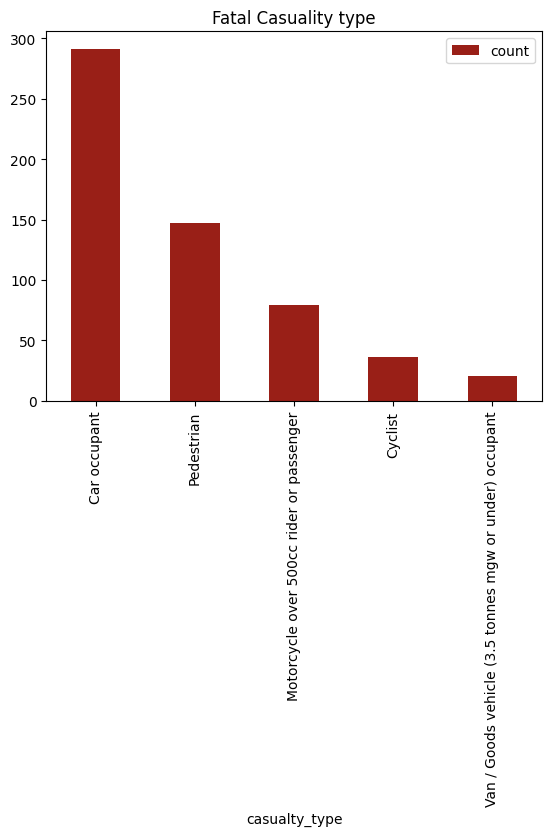

In [26]:
bar_df.casualty_type = bar_df.casualty_type.apply(convert_type)
bar_df.plot.bar(x='casualty_type', y='count', title='Fatal Casuality type', color='#991f17')

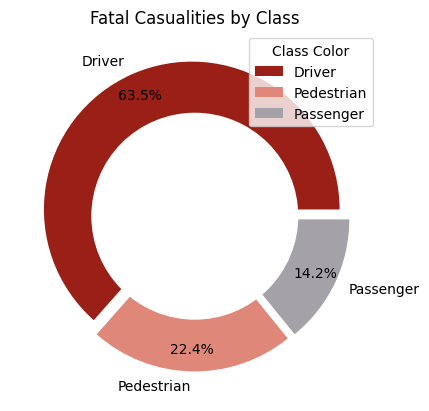

In [27]:
# colors
colors = ['#991f17', '#df8879', '#a4a2a8']

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(fatal_df['casualty_class'].value_counts(), colors=colors, labels=fatal_df['casualty_class'].unique(),
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Fatal Casualities by Class')

# Add Legends
plt.legend(fatal_df['casualty_class'].unique(), loc="upper right", title="Class Color")

# Displaying Chart
plt.show()

<Axes: title={'center': 'Casuality Severity for Pedestrian'}, xlabel='index'>

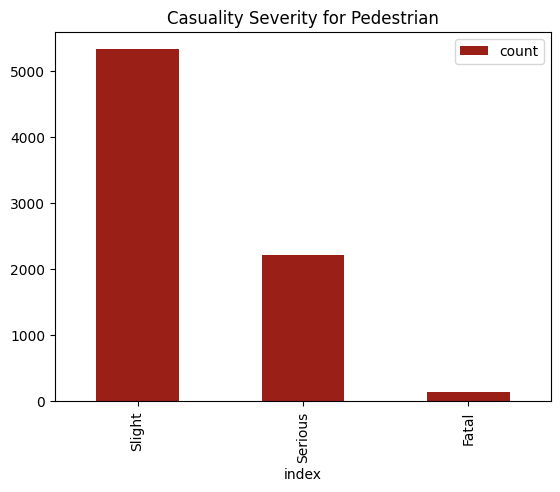

In [28]:
pedestrian_df = df_cleaned[df_cleaned['casualty_class']=='Pedestrian']
pedestrian_df['casualty_severity'].value_counts().reset_index(name='count').plot.bar(x='index', y='count', title='Casuality Severity for Pedestrian', color='#991f17')

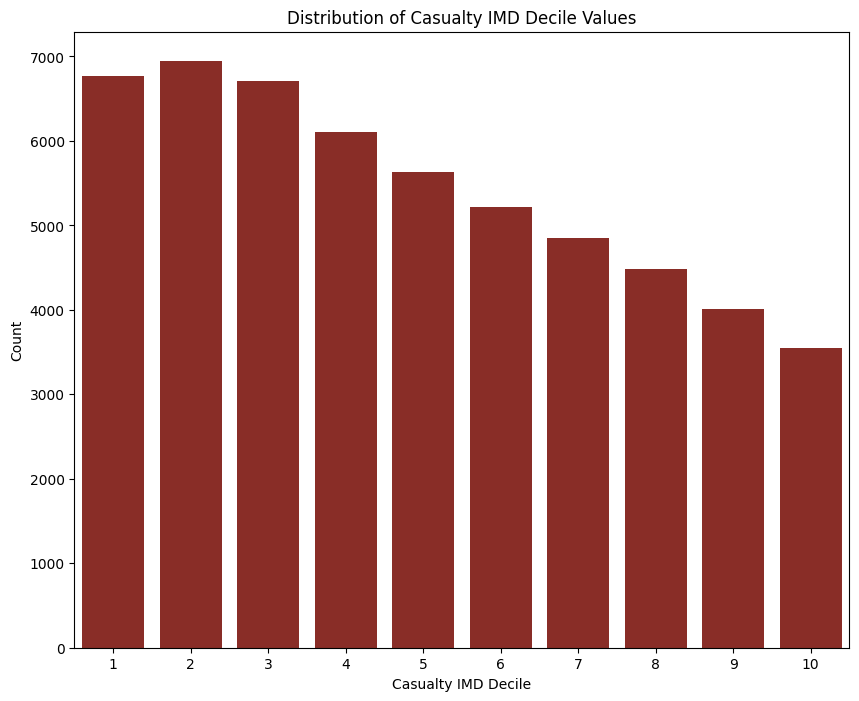

In [30]:
plt.figure(figsize=(10, 8))
sns.countplot(x='casualty_imd_decile', data=df_cleaned, color='#991f17')
plt.title('Distribution of Casualty IMD Decile Values')
plt.xlabel('Casualty IMD Decile')
plt.ylabel('Count')
plt.show()